# Final Project - Lập trình cho Khoa học dữ liệu
## Github
https://github.com/hudavn/G12-P4DS-Final

## Thông tin nhóm

Nhóm: 12

Số lượng thành viên: 2

Thành viên 1:
- Họ và tên: Nguyễn Hữu Đạt
- MSSV: 19127003
- Email: 19127003@student.hcmus.edu.vn

Thành viên 2:
- Họ và tên: Nguyễn Minh Trí
- MSSV: 19127595
- Email: 19127595@student.hcmus.edu.vn

## Thông tin đồ án

## Các thư viện hỗ trợ

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Thu thập dữ liệu
> What subject is your data about? What is the source of your data?

Đây là tập dữ liệu xuyên quốc gia chứa tất cả các giao dịch diễn ra từ ngày 01/12/2010 đến 09/12/2011 cho một cửa hàng bán lẻ trực tuyến (không có cửa hàng trực tiếp) và có trụ sở tại Vương quốc Anh. Công ty chủ yếu bán quà tặng các dịp lễ. Đa số khách hàng của công ty là những thương lái.

> Do authors of this data allow you to use like this?

Không có thông tin về License trên Kaggle, tuy nhiên tập dữ liệu được hiển thị public trên Kaggle và được lấy từ một nguồn online miễn phí khác ([UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php))

> How did authors collect data?

Không có thông tin về việc tác giả thu thập như thế nào, tuy nhiên người upload tập dữ liệu này trên Kaggle, lấy trực tiếp từ [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) và sở hữu thực tế được ghi trên thư viện này là "*Dr Daqing Chen, Director: Public Analytics group. chend '@' lsbu.ac.uk, School of Engineering, London South Bank University, London SE1 0AA, UK*".



In [2]:
path = "./data.csv"
content = pd.read_csv(path, encoding= 'unicode_escape')
content

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


## Khám phá dữ liệu

### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [3]:
rows = content.shape[0]
cols = content.shape[1]
print(f"Dữ liệu trên có {rows} dòng và {cols} cột")

Dữ liệu trên có 541909 dòng và 8 cột


### Mỗi dòng có ý nghĩa gì? 

Mỗi dòng là thông tin giao dịch một loại hàng hoá của một khách hàng.

### Trong dữ liệu trên  ( chưa qua xử lý), có dòng bị lặp không?

In [4]:
print(f"Dữ liệu trên có {content.duplicated().sum()} dòng bị lặp")

Dữ liệu trên có 5268 dòng bị lặp


### Mỗi cột có ý nghĩa gì?

- <b>InvoiceNo</b>: Mã hoá đơn, , nếu mã này có kí tự đầu là "C" thì giao dịch đó đã bị huỷ.
- <b>StockCode</b>: Mã sản phẩm
- <b>Description</b>: Tên sản phẩm
- <b>Quantity</b>: Số lượng mỗi sản phẩm trên mỗi lần giao dịch
- <b>InvoiceDate</b>: Ngày và giờ giao dịch
- <b>UnitPrice</b>: Đơn giá. Đơn giá này được tính theo đơn vị Bảng Anh.
- <b>CustomerID</b>: Mã khách hàng
- <b>Country</b>: Tên quốc gia của khách hàng

### Mỗi cột đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để xử lý ở những bước tiếp theo không?

In [5]:
pd.DataFrame(content.dtypes).T.rename(index={0:'type'})

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
type,object,object,object,int64,object,float64,float64,object


- Các cột <b>InvoiceNo</b>, <b>StockCode</b>, <b>Description</b>, <b>Country</b>: Có kiểu dữ liệu ở dạng chuỗi. Kiểu dữ liệu này thích hợp cho các loại dữ liệu trên nên đây là kiểu dữ liệu đúng.
- Các cột <b>Quantity</b>, <b>CustomerID</b>, <b>UnitPrice</b>: Có kiểu dữ liệu dạng số. Thể hiện đúng tên của từng cột.
- Cột <b>InvoiceDate</b>: Có kiểu dữ liệu dạng chuỗi. Để thuận tiện hơn khi xử lý thời gian, cần chuyển về dạng datetime. Em sẽ chuyển ngay dưới đây.

In [6]:
content['InvoiceDate'] = pd.to_datetime(content['InvoiceDate'])
categorical_cols = ['InvoiceNo', 'StockCode', 'Description', 'Country']
numeric_cols = ['Quantity', 'CustomerID', 'UnitPrice']

### Với mỗi cột dạng số thực và dạng datetime, các giá trị được phân bố như thế nào?

Ở đây có 3 cột số thực là <b>Quantity</b>, <b>CustomerID</b> và <b>UnitPrice</b>. Em sẽ khám phá xem tỷ lệ % giá trị bị thiếu của các cột trên.

In [7]:
def missing_rate(df):
    return (df.isna().sum() / len(df)) * 100

null_numeric = content[numeric_cols] .agg([missing_rate])
null_numeric

,Quantity,CustomerID,UnitPrice
missing_rate,0.0,24.926694,0.0


Nhìn vào bảng trên, nhận thấy cột <b>Quantity</b> và cột <b>UnitPrice</b> có 0% tỷ lệ thiếu. Nhưng cột <b>CustomerID</b> có đến 24.9% tỷ lệ thiếu. Đây là cột CustomerID, mỗi khách hàng có một CustomerID duy nhất, những giá trị này bị thiếu có lẽ do người dùng thực hiện giao dịch mà không đăng nhập vào tài khoản.

In [8]:
content['InvoiceDate'] = pd.to_datetime(content['InvoiceDate'])
min_Quantity = min(content['Quantity'])
max_Quantity = max(content['Quantity'])
min_UnitPrice = min(content['UnitPrice'])
max_UnitPrice = max(content['UnitPrice'])
min_InvoiceDate = min(content['InvoiceDate']) 
max_InvoiceDate = max(content['InvoiceDate'])
data_min_max = {
    'Quantity': [min_Quantity, max_Quantity],
    'UnitPrice': [min_UnitPrice, max_UnitPrice],
    'InvoiceDate': [min_InvoiceDate, max_InvoiceDate]
}
min_max_numeric = pd.DataFrame(data_min_max).rename(index={0:'min', 1:'max'})
min_max_numeric

,Quantity,UnitPrice,InvoiceDate
min,-80995,-11062.06,2010-12-01 08:26:00
max,80995,38970.00,2011-12-09 12:50:00


min và max của cột <b>InvoiceDate</b> không có gì bất thường. Nhưng min và max của cột <b>Quantity</b> và cột <b>UnitPrice</b> chứa số âm. Số âm này thể hiện số lượng trả lại và giá trị đơn trả lại. Nên đây cũng không có gì bất thường.

### Với mỗi cột có kiểu dữ liệu dạng phân loại, các giá trị được phân bố như thế nào?

In [9]:
def missing_rate(df):
    return (df.isna().sum() / len(df)) * 100
def num_of_diss(df):
    return df.nunique()

num_cols_info = content[categorical_cols].agg([missing_rate, num_of_diss])
num_cols_info

,InvoiceNo,StockCode,Description,Country
missing_rate,0.0,0.0,0.268311,0.0
num_of_diss,25900.0,4070.0,4223.000000,38.0


Theo bảng trên, chỉ có cột Description có dữ liệu bị thiếu, và thiếu 0.268%. Mặc dù có 4070 mã sản phẩm nhưng lại có tới 4223 tên cho sản phẩm. Số lượng các giá trị khác nhau trong cột dạng categorical đều là số dương. Dữ liệu thu thập được không có gì bất thường. Để có cái nhìn rõ hơn về các giá trị còn thiếu, nhóm em sẽ in ra các dòng còn thiếu.

In [10]:
des_missing = content[content['Description'].isna()]
des_missing

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [11]:
max_price = content[content['Description'].isna()]['UnitPrice'].max()
customer_not_missing = sum(content[content['Description'].isna()]['CustomerID'].isna())
print(f"Giá trị lớn nhất khi giao dịch của các giao dịch khi bị thiếu Description là: {max_price}")
print(f"Số lượng CustomerID bị thiếu khi Description bị thiếu là: {customer_not_missing}")

Giá trị lớn nhất khi giao dịch của các giao dịch khi bị thiếu Description là: 0.0
Số lượng CustomerID bị thiếu khi Description bị thiếu là: 1454


Nhìn vào các giá trị ở cột <b>Description</b> bị thiếu, nhận thấy rằng toàn bộ giá trị của cột <b>UnitPrice</b> đều có giá trị = 0 và toàn bộ giá trị cột <b>CustomerID</b> đều bị thiếu. Dữ liệu bất thường do không có CustomerID và UnitPrice = 0.

## Đặt vấn đề

*Sau khi khám phá dữ liệu, ta có một số câu hỏi sau cần trả lời:*

1. Thời điểm nào trong năm là mùa best-sell và mùa nào là mùa ế hàng?
2. Loại hàng nào là best-seller all the time (top 3), và top 5 quốc gia có lượt mua hàng nhiều nhất đến thời điểm thu thập dữ liệu.
3. CRR (Customer Retention Rate - tỉ lệ duy trì khách hàng).
4. Doanh nghiệp đang có dự định tổ chức hệ thống khách hàng nhằm thiết kế các chương trình ưu đãi cũng như chăm sóc khách hàng được hiệu quả hơn. Doanh nghiệp muốn chia tập khách hàng theo hành vi mua hàng (tổng số tiền đặt hàng - tổng số tiền trả hàng, tổng số lượng đơn hàng đã đặt), khách hàng sẽ đượp xếp hạng dựa trên credits được tính như sau:
    - **10 bảng Anh = 1 credit**
    - **Standard member**: tích lũy từ **0 credit**
    - **Silver member**: tích lũy từ **50 credits**
    - **Gold member**: tích lũy từ **100 credits**
    - **Platinum member**: tích lũy từ **1.000 credits**
    - **Diamond member**: tích lũy từ **10.000 credits**

## Tiền xử lí dữ liệu

Ở bước <b>Khám phá dữ liệu</b>, nhận thấy có các hàng bị trùng lặp. Để xử lý em sẽ bỏ những hàng đó

In [12]:
content.drop_duplicates(inplace=True)

Để trả lời được câu hỏi liên quan tới số lượng hàng hóa giao dịch, mình cần quan tâm tới cột <b>StockCode</b> và cột. Các dữ liệu này cần phải được làm sạch trước khi phân tích để trả lời câu hỏi. Dữ liệu ở hai cột này có bị thiếu không? Sau đây em sẽ đếm số giá trị thiếu của cột <b>StockCode</b> bằng hàm <b>isnull().sum()</b>. Sau đó sẽ dùng thư viện <b>Seaborn.barplot</b> để trực quan giá trị thiếu bằng biểu đồ cột.

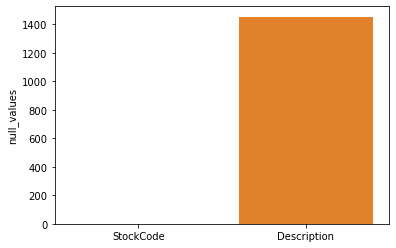

In [13]:
stock_question_data = content.copy()
null_values = pd.DataFrame(stock_question_data[['StockCode', 'Description']].isnull().sum(),columns=['null_values'])
ax = sns.barplot(y=null_values.null_values, x=null_values.index)

Nhận thấy cột <b>Description</b> có giá trị thiếu nhưng lại không ảnh hưởng gì tới việc phân tích dữ liệu để trả lời những câu hỏi mà nhóm em đã đặt ra. Cột này cũng không thể điền giá trị thiếu bằng những phương pháp thông kê và cũng không được dùng trong quá trình phân tích các câu hỏi nên em sẽ xóa cột này đi

In [14]:
stock_question_data.drop('Description', axis=1, inplace=True)
pd.DataFrame(pd.DataFrame(stock_question_data.isnull().sum()/stock_question_data.shape[0]*100).T.
                         rename(index={0:'Missing (%)'}))

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Missing (%),0.0,0.0,0.0,0.0,0.0,25.163377,0.0


## Phân tích dữ liệu và trả lời câu hỏi

### Câu hỏi 1: Thời điểm nào trong năm bán được nhiều hàng nhất và thời điểm nào bán được ít hàng nhất

Từ 01/12/2010 đến 09/12/2011, số lượng đơn hàng bán được trong mỗi tháng là bao nhiêu? Trước hết em phải xử lý cột <b>Quantity</b>, chỉ xét những giá trị dương ở cột này. Vì những giá trị dương này đại diện cho đơn hàng đó được bán, đồng thời chỉ lấy những giá trị **mã hóa đơn** không không bị hủy nghĩa là chỉ lấy những **hóa đơn** không có kí tự `C` ở đầu. Tiếp theo sẽ tạo thêm một cột <b>year_month</b> là một số nguyên với (năm trước, ngày sau). Ví dụ tháng 1 năm 2011 sẽ thành 201101 để tiện khi đếm số đơn đặt hàng trong mỗi tháng. Tiếp theo dùng <b>groupby</b> để nhóm mã đơn hàng và tháng năm đã đặt, gọi phương thức <b>unique</b> lấy giá trị duy nhất của mã đơn hàng. Sau đó đếm các giá trị này theo mỗi tháng, sắp xếp các giá trị vừa đếm được theo nhóm <b>year_month</b>. Biểu diễn dữ liệu vừa tạo ra bằng biểu đồ cột với trục x là tháng trong năm và trục y là số lượng đơn hàng trong tháng.

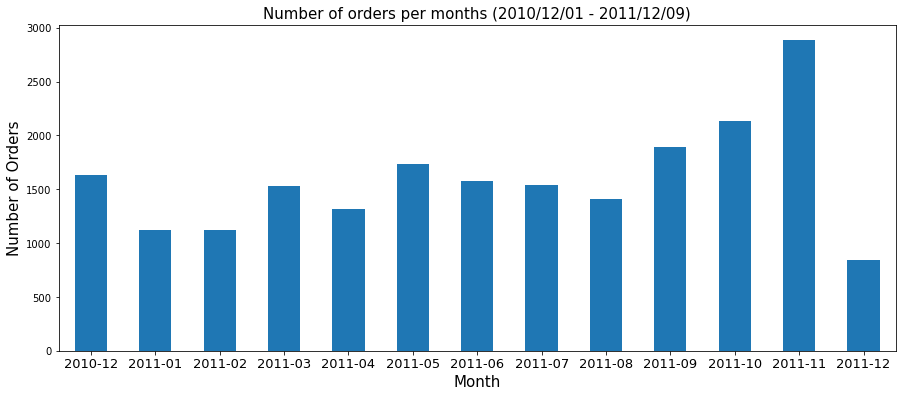

In [15]:
stock_sold = stock_question_data[['InvoiceNo', 'InvoiceDate', 'Quantity']][stock_question_data['Quantity'] > 0]
sold = stock_sold[stock_sold['InvoiceNo'].str[0] != 'C']

sold['year_month'] = 100*sold['InvoiceDate'].dt.year + sold['InvoiceDate'].dt.month

ax = sold.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xticklabels(('2010-12','2011-01','2011-02','2011-03',
                    '2011-04','2011-05','2011-06','2011-07',
                    '2011-08','2011-09','2011-10','2011-11','2011-12'), 
                   rotation='horizontal', fontsize=13)
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders per months (2010/12/01 - 2011/12/09)',fontsize=15)
plt.show()

- Tháng 12/2011 là tháng đặc biệt vì chỉ thu thập trong 9 ngày nên tạm thời chưa đủ dữ liệu để so sánh với các tháng khác
- Dựa vào biểu đồ trên, tháng 9, 10, 11 có nhiều đơn đặt hàng nhất đặc biệt là tháng 11. Cõ lẽ ở những tháng cuối năm nhu cầu mua sắm để chuẩn bị cho dịp lễ cuối năm tăng cao nên số lượng đơn hàng cũng tập trung nhiều vào những tháng này. Và đây cũng là dịp các cửa hàng tung ra nhiều đợt khuyến mãi để kích thích tiêu dùng kéo sức mua, vào cuối năm khách hàng tự tin hơn khi chi tiêu giúp tăng doanh số bán hàng.
- Tháng 1, 2 năm 2011 có ít đơn hàng nhất (đã loại trừ tháng 12). Có lẽ sau những tháng cuối năm mạnh tay chi tiêu thì chi tiêu đầu năm lại tiết kiệm hơn.

### Câu hỏi 2: Top 3 loại hàng nào bán chạy nhất và top 5 quốc gia có lượng giao dịch nhiều nhất

#### Top 3 loại hàng bán chạy nhất

Do hàng hóa hiện tại có hàng trả lại hoàn tiền (Quantity < 0) và hàng được tặng miễn phí (Quantity = 0) nên trước tiên để tìm loại hàng hóa bán chạy nhất phải loại bỏ những giá trị **Quantity <= 0**  lưu vào biến stock_sold. Loại ra những đơn hàng bị hủy với **mã hóa đơn** `C` ở đầu. Dùng phương thức **value_counts().sort_values()** để đếm sô lượng giá trị **StockCode** đồng thời sắp xếp theo thứ tự giảm dần. Lấy ra 3 giá trị đầu tiên, dùng **seaborn.barplot** để biểu diễn biểu đồ cột với trục x là mã sản phẩm và trục y lượng được bán

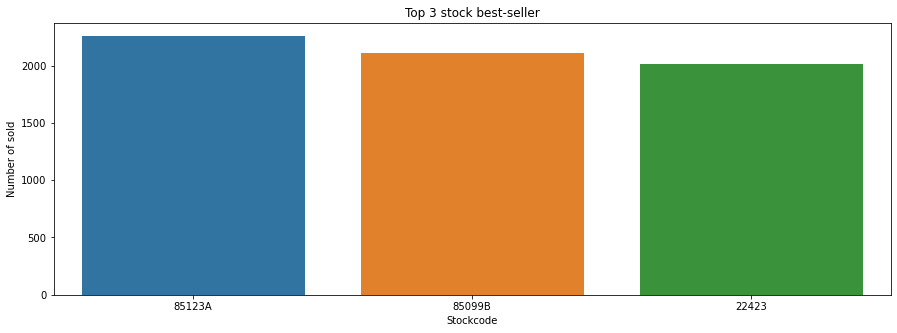

In [16]:
stock_sold = stock_question_data[['StockCode', 'InvoiceNo']][stock_question_data['Quantity'] > 0]
stock_sold = stock_sold[stock_sold['InvoiceNo'].str[0] != 'C']

top_3_stock = stock_sold.StockCode.value_counts().sort_values(ascending=False).head(3)
plt.figure(figsize=(15,5))
sns.barplot(x=top_3_stock.index, y=top_3_stock.values)
plt.ylabel("Number of sold")
plt.title("Top 3 stock best-seller")
plt.xlabel("Stockcode")
plt.show()

Sau khi có kết quả 3 sản phẩm bán chạy nhất, mình có thể tăng thêm doanh thu từ các sản phẩm này bằng cách gắn nhãn **best-seller**. Bản thân em là người tiêu dùng thì luôn thích sản phẩm có nhãn này nhằm yên tâm hơn vì có nhiều người sử dụng.

#### Top 5 quốc gia có lượng giao dịch nhiều nhất

Để xem 5 quốc gia nào có lượng giao dịch nhiều nhất, em sẽ đếm số lượng thành phố xuất hiện trong dữ liệu bằng phương thức <b>value_counts</b> sau đó sắp xếp dữ liệu vừa đếm được theo thứ tự giảm dần và chỉ lấy 5 giá trị đầu tiên. Dùng <b>seaborn.barplot</b> để biểu diễn biểu đồ cột cho tiện việc so sánh. Do công ty này có trụ sở tại Anh nên lượng giao dịch tại nước Anh rất lớn nếu giữ nguyên tỷ lệ rất khó quan sát nên em đã đưa về tỷ lệ theo <b>log</b> để có cái nhìn trực quan hơn. Em chọn <b>log</b> vì hàm số này nhạy cảm với những chêch lệch nhỏ, dễ phát hiện khi trực quan.

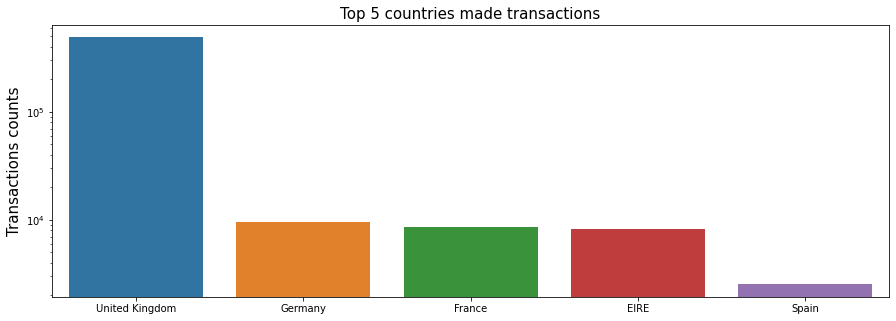

In [17]:
top_5_transactions = stock_question_data.Country.value_counts().sort_values(ascending=False).head(5)
plt.figure(figsize=(15,5))
sns.barplot(x=top_5_transactions.index, y=top_5_transactions.values)
plt.ylabel("Transactions counts", fontsize=15)
plt.title("Top 5 countries made transactions", fontsize=15)
plt.yscale("log")
plt.show()

Đúng như em đã dự đoán thì <b>Anh</b> là quốc gia có lượng giao dịch lớn nhất, tiếp theo là <b>Đức, Pháp</b> và <b>Ireland</b>. Những nước ở phía sau thì lượng giao dịch chiếm tỉ lệ rất ít

### Câu hỏi 3: CRR (Customer Retention Rate - tỉ lệ duy trì khách hàng)
Theo [vnpoint.vn](https://vnpoint.vn/bi-quyet-toi-uu-customer-retention-rate/),

Customer Retention có thể hiểu là giữ chân khách hàng. Đây là một yếu tố rất quan trọng trong tất cả các doanh nghiệp bởi lượng khách hàng trung thành luôn là nguồn khách cần được duy trì nhất. Việc “giữ chân” được một khách hàng và để họ tiếp tục quay lại mua sản phẩm giúp doanh nghiệp tiết kiệm được rất nhiều chi phí. 

Customer Retention là yếu tố mà doanh nghiệp cần quan tâm hàng đầu.

Cũng bởi tầm quan trọng ấy mà hầu hết các doanh nghiệp đều đặt việc chăm sóc khách hàng lên hàng đầu. Bên cạnh việc tìm kiếm khách hàng tiềm năng thì việc duy trì khách hàng cũ là điều không thể bỏ qua.

Tỉ lệ duy trì khách hàng được tính theo công thức CRR = (CE – CN)/CS x 100%.

Trong đó:
- CE: số khách hàng ở cuối một giai đoạn nhất định.
- CN: số khách hàng mới trong giai đoạn đó.
- CS: số khách hàng ở đầu giai đoạn đó.

Theo đó, CRR giúp các doanh nghiệp đưa ra được những chiến lược phù hợp để giữ chân khách hàng và phát triển doanh nghiệp kịp thời.

In [18]:
content.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


Ta sẽ tính toán CRR theo trung bình của các khung thời gian từ 1 đến 12 tháng.

Nhưng trước tiên, ta sẽ cần thêm 2 cột tháng và năm vào tập dữ liệu hiện có để thuận tiện cho việc phân tích.

In [19]:
new_content = content.copy()
new_content['InvoiceMonth'] = new_content['InvoiceDate'].dt.month
new_content['InvoiceYear'] = new_content['InvoiceDate'].dt.year
new_content.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,InvoiceYear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010


In [20]:
start_month = new_content['InvoiceDate'].min().month
end_month = new_content['InvoiceDate'].max().month

start_year = new_content['InvoiceDate'].min().year
end_year = new_content['InvoiceDate'].max().year

CRR_range = list(range(1, 13))
CRR = []

# print(end_month, end_year)

for r in CRR_range:
    m = start_month
    y = start_year
    cnt = 0
    val = 0
    while m <= end_month and y <= end_year:
        to_m = (m + r - 1)%12
        to_y = y
        if to_m == 0: to_m = 12
        if to_m <= m: to_y+=1 
        
        if to_y > end_year or (to_y == end_year and to_m > end_month): 
            break
        
        CE = new_content[(new_content['InvoiceMonth']==to_m) & 
                             (new_content['InvoiceYear']==to_y)]['CustomerID'].drop_duplicates()
        CS = new_content[(new_content['InvoiceMonth']==m) & 
                             (new_content['InvoiceYear']==y)]['CustomerID'].drop_duplicates()
        CN = CE[~CE.isin(CS)]
        
        CE = len(CE)
        CS = len(CS)
        CN = len(CN)
        
        val += (CE-CN)/CS * 100
        cnt += 1
        
        m = to_m + 1
        if m == 13: m = 1
        if m == 1: y+=1
        else: y = to_y
    
    CRR.append(round(val/cnt, 3))    
    
CRR

[27.503,
 43.584,
 43.746,
 44.811,
 40.426,
 45.956,
 38.04,
 35.511,
 35.511,
 39.515,
 37.408,
 50.053]

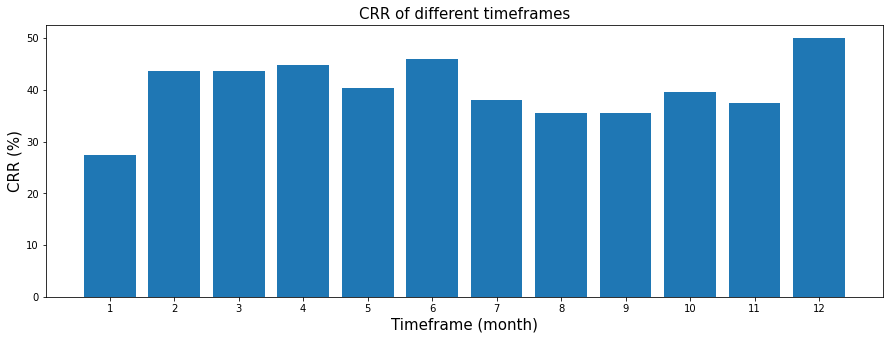

In [21]:
plt.figure(figsize=(15,5))
plt.bar(CRR_range, CRR, )
plt.xlabel("Timeframe (month)", fontsize=15)
plt.ylabel("CRR (%)", fontsize=15)
plt.title("CRR of different timeframes", fontsize=15)
plt.xticks(CRR_range)
plt.show()

Như vậy, ta có thể thấy, CRR của doanh nghiệp giao động trong khoảng 35-45% trong đa số các khung thời gian, đặc biệt đối với khung thời gian 1 năm thì CRR đạt khoảng 50%, tuy nhiên con số ở khung 1 tháng lại nằm ở mức khá thấp so với mặt bằng chung (dưới 30%).

### Câu hỏi 4: Xếp hạng khách hàng

Doanh nghiệp đang có dự định tổ chức hệ thống khách hàng nhằm thiết kế các chương trình ưu đãi cũng như chăm sóc khách hàng được hiệu quả hơn. Doanh nghiệp muốn chia tập khách hàng theo tổng chi tiêu, khách hàng sẽ đượp xếp hạng dựa trên credits được tính như sau:
- **10 bảng Anh = 1 credit**
- **Standard member**: tích lũy từ **0 credit**
- **Silver member**: tích lũy từ **50 credits**
- **Gold member**: tích lũy từ **100 credits**
- **Platinum member**: tích lũy từ **1.000 credits**
- **Diamond member**: tích lũy từ **10.000 credits**

Như vậy mục tiêu của chúng ta là cần phải tính điểm credit đã tích lũy của từng khách hàng dựa trên tổng chi tiêu. Lưu ý, ở đây chúng ta có những đơn hàng được trả lại, do đó chúng ta sẽ trừ những khoản tiền này ra cũng như loại trừ các giao dịch với loại hàng là quà tặng. 

Chúng ta sẽ thực hiện lọc ra các giao dịch mua hàng và trả hàng, loại bỏ các giao dịch quà tặng, cũng như thêm vào cột **Spent** để thuận tiện trong việc tính toán và phân tích về sau.

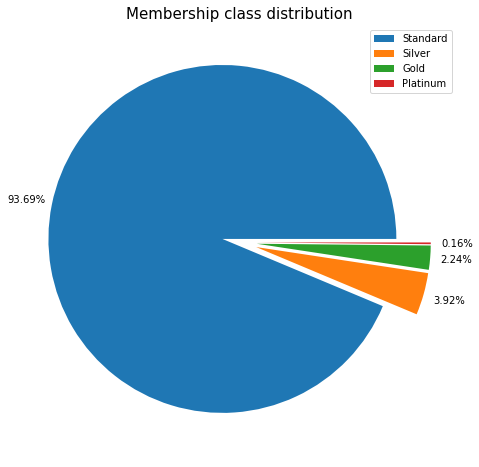

In [22]:
money_spent = content[(content['Quantity']!=0) & (content['InvoiceNo'].str[0] != 'C')].copy()
money_spent
money_spent['Spent'] = money_spent['Quantity']*money_spent["UnitPrice"]
money_spent = money_spent.groupby("CustomerID")['Spent'].agg('sum').sort_values()

member_class = pd.Series(index = money_spent.index, dtype  = 'object')
for each in money_spent.index:
    if money_spent[each]/100 >= 10000:
        member_class[each] = "Diamond"
    elif money_spent[each]/100 >= 1000:
        member_class[each] = "Platinum"
    elif money_spent[each]/100 >= 100:
        member_class[each] = "Gold"
    elif money_spent[each]/100 >= 50:
        member_class[each] = "Silver"
    else: member_class[each] = "Standard"
        
class_counts = member_class.value_counts()
plt.figure(figsize=(15,8))
plt.pie(class_counts.values,
        explode = [0.1, 0.1, 0.1, 0.1],
        autopct='%1.2f%%', pctdistance=1.15)
plt.title("Membership class distribution", fontsize=15)
plt.legend(class_counts.index)
plt.show()

Như vậy, tệp khách khàng của công ty chiếm đa số ở hạng Standard.

## Tổng kết

### Thành viên 1: Nguyễn Hữu Đạt

#### Khó khăn gặp phải

- Những buổi đầu tiên khi làm việc nhóm, chưa có kinh nghiệm về việc tạo template, do đó dẫn đến việc xung đột một lượng lớn nội dung của bài làm giữa các thành viên.
- Kiến thức về kinh tế chưa nhiều, do đó rất khó để phân tích và trả lời câu hỏi một cách sâu nghĩa hơn.

#### Những kiến thức học được

- Thành thạo các thao tác cơ bản với Git, trải nghiệm cảm giác làm việc với phong thái chuyên nghiệp.
- Nắm và hình dung được quy tắc chia các workflow sao cho phù hợp để tránh bị conflict.
- Phát triển khả năng giải quyết vấn đề, lãnh đạo, làm việc nhóm.
- Hiểu được giá trị và tầm quan trọng của knowledge domain trong việc phân tích dữ liệu.

### Thành viên 2: Nguyễn Minh Trí

#### Những khó khăn gặp phải

- Chưa có nhiều kinh nghiệm khi làm các bài toán về Khoa Học Dữ Liệu nên gặp khó khăn trong lúc đặt ra câu hỏi và phân tích trên dữ liệu tìm câu trả lời
- Khi merge code lên github hay bị lỗi giữa các file, commit.
- Chưa biết nên chọn loại trực quan nào có thể mô tả được hết ý nghĩa dữ liệu mình đang phân tích.

#### Những kiến thức học được

- Có được một cách nhìn khác về dữ liệu, cung cấp cho em thêm nhiều góc nhìn hay về tầm quan trọng và giá trị của dữ liệu.
- Học được kỹ năng làm việc nhóm. Nhờ sự giúp đỡ của bạn Đạt giúp em học được thêm nhiều điều.
- Quy trình làm bài về Khoa Học Dữ Liệu, cách khám phá và phân tích ý nghĩa của dữ liệu.
- Cách sử dụng github để cùng làm việc với nhau.

### Sẽ làm gì nếu có thêm thời gian

- Sẽ tham khảo thêm nhiều bài viết về chủ đề này để có thêm nhiều góc nhìn đến nhiều hướng của dữ liệu.
- Nghiên cứu nhiều hơn về các bài toán kinh tế, để có thể phân tích sâu hơn và đặt được nhiều câu hỏi mang giá trị hơn.
- Áp dụng các mô hình học máy để phục vụ các câu hỏi mang giá trị kinh tế hơn (nếu có, sau khi nghiên cứu kĩ).

## Nguồn tham khảo

1. https://www.kaggle.com/admond1994/e-commerce-data-eda#Discover-patterns-for-Number-of-Orders
2. https://www.w3schools.com/
3. https://vnpoint.vn/bi-quyet-toi-uu-customer-retention-rate/